In [1]:
## Store Sales- Time Series Forcasting 

In [35]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [15]:
#datasets
train_df = pd.read_csv("/Users/krushna/Downloads/store-sales-time-series-forecasting/train.csv")

In [17]:
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [19]:
train_df['Time'] = np.arange(len(train_df.index))

In [31]:
# Time-set Feature 
# As it is already set on timely manner, therefore setting up nodes or rows as time is reasonable
# Linear regression with the time dummy produces the model:
#target = weight * time + bias
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,Time
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2
3,3,2013-01-01,1,BEVERAGES,0.0,0,3
4,4,2013-01-01,1,BOOKS,0.0,0,4
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,5
6,6,2013-01-01,1,CELEBRATION,0.0,0,6
7,7,2013-01-01,1,CLEANING,0.0,0,7
8,8,2013-01-01,1,DAIRY,0.0,0,8
9,9,2013-01-01,1,DELI,0.0,0,9


/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_40045/986772941.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


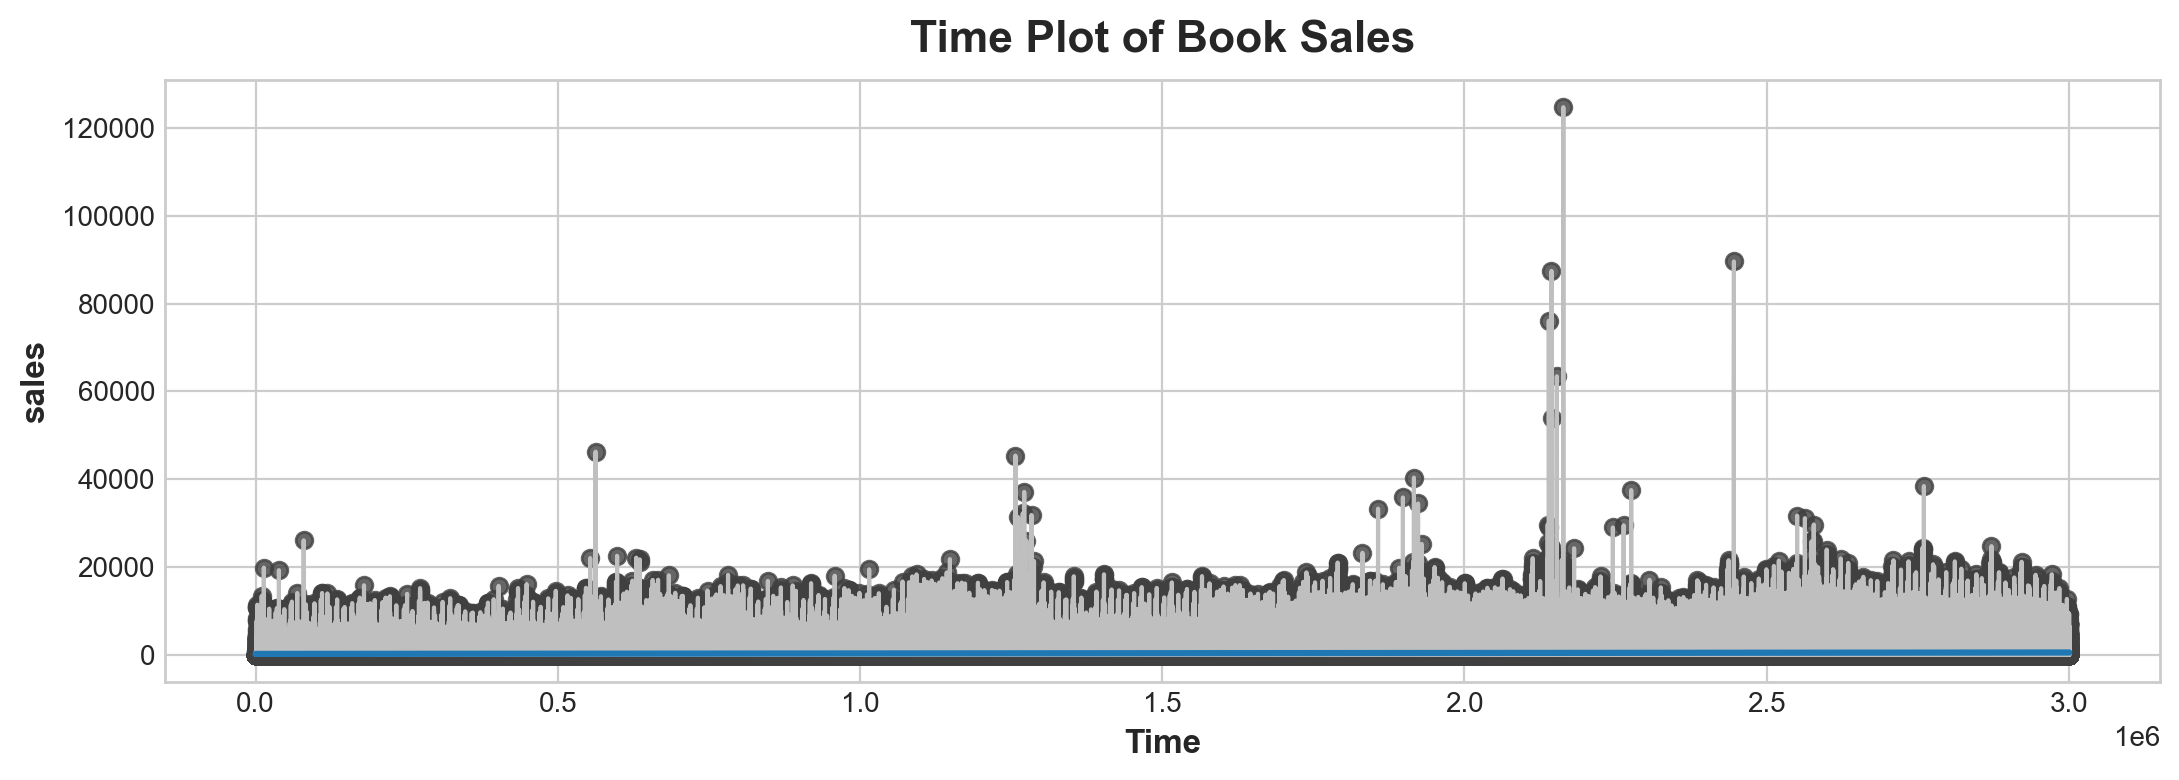

In [30]:
plt.style.use("seaborn-whitegrid")
plt.rc(
        "figure",
        autolayout=True,
        figsize= (11,4),
        titlesize = 18,
        titleweight = "bold")

plt.rc(
        "axes",
        labelweight = "bold",
        labelsize = "large",
        titleweight = "bold", 
        titlesize = 16,
        titlepad = 10)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'sales', data=train_df, color='0.75')
ax = sns.regplot(x='Time', y='sales', 
                 data=train_df, ci=None, 
                 scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Book Sales');

In [48]:
## Linear Regression 
x = train_df["Time"].values.reshape(-1, 1)  # Reshape to a 2D array
y = train_df["sales"]

# Train model
model = LinearRegression()
# Fit Model
model.fit(x, y)
# Predict
y_pred = pd.Series(model.predict(x), index=x.flatten())

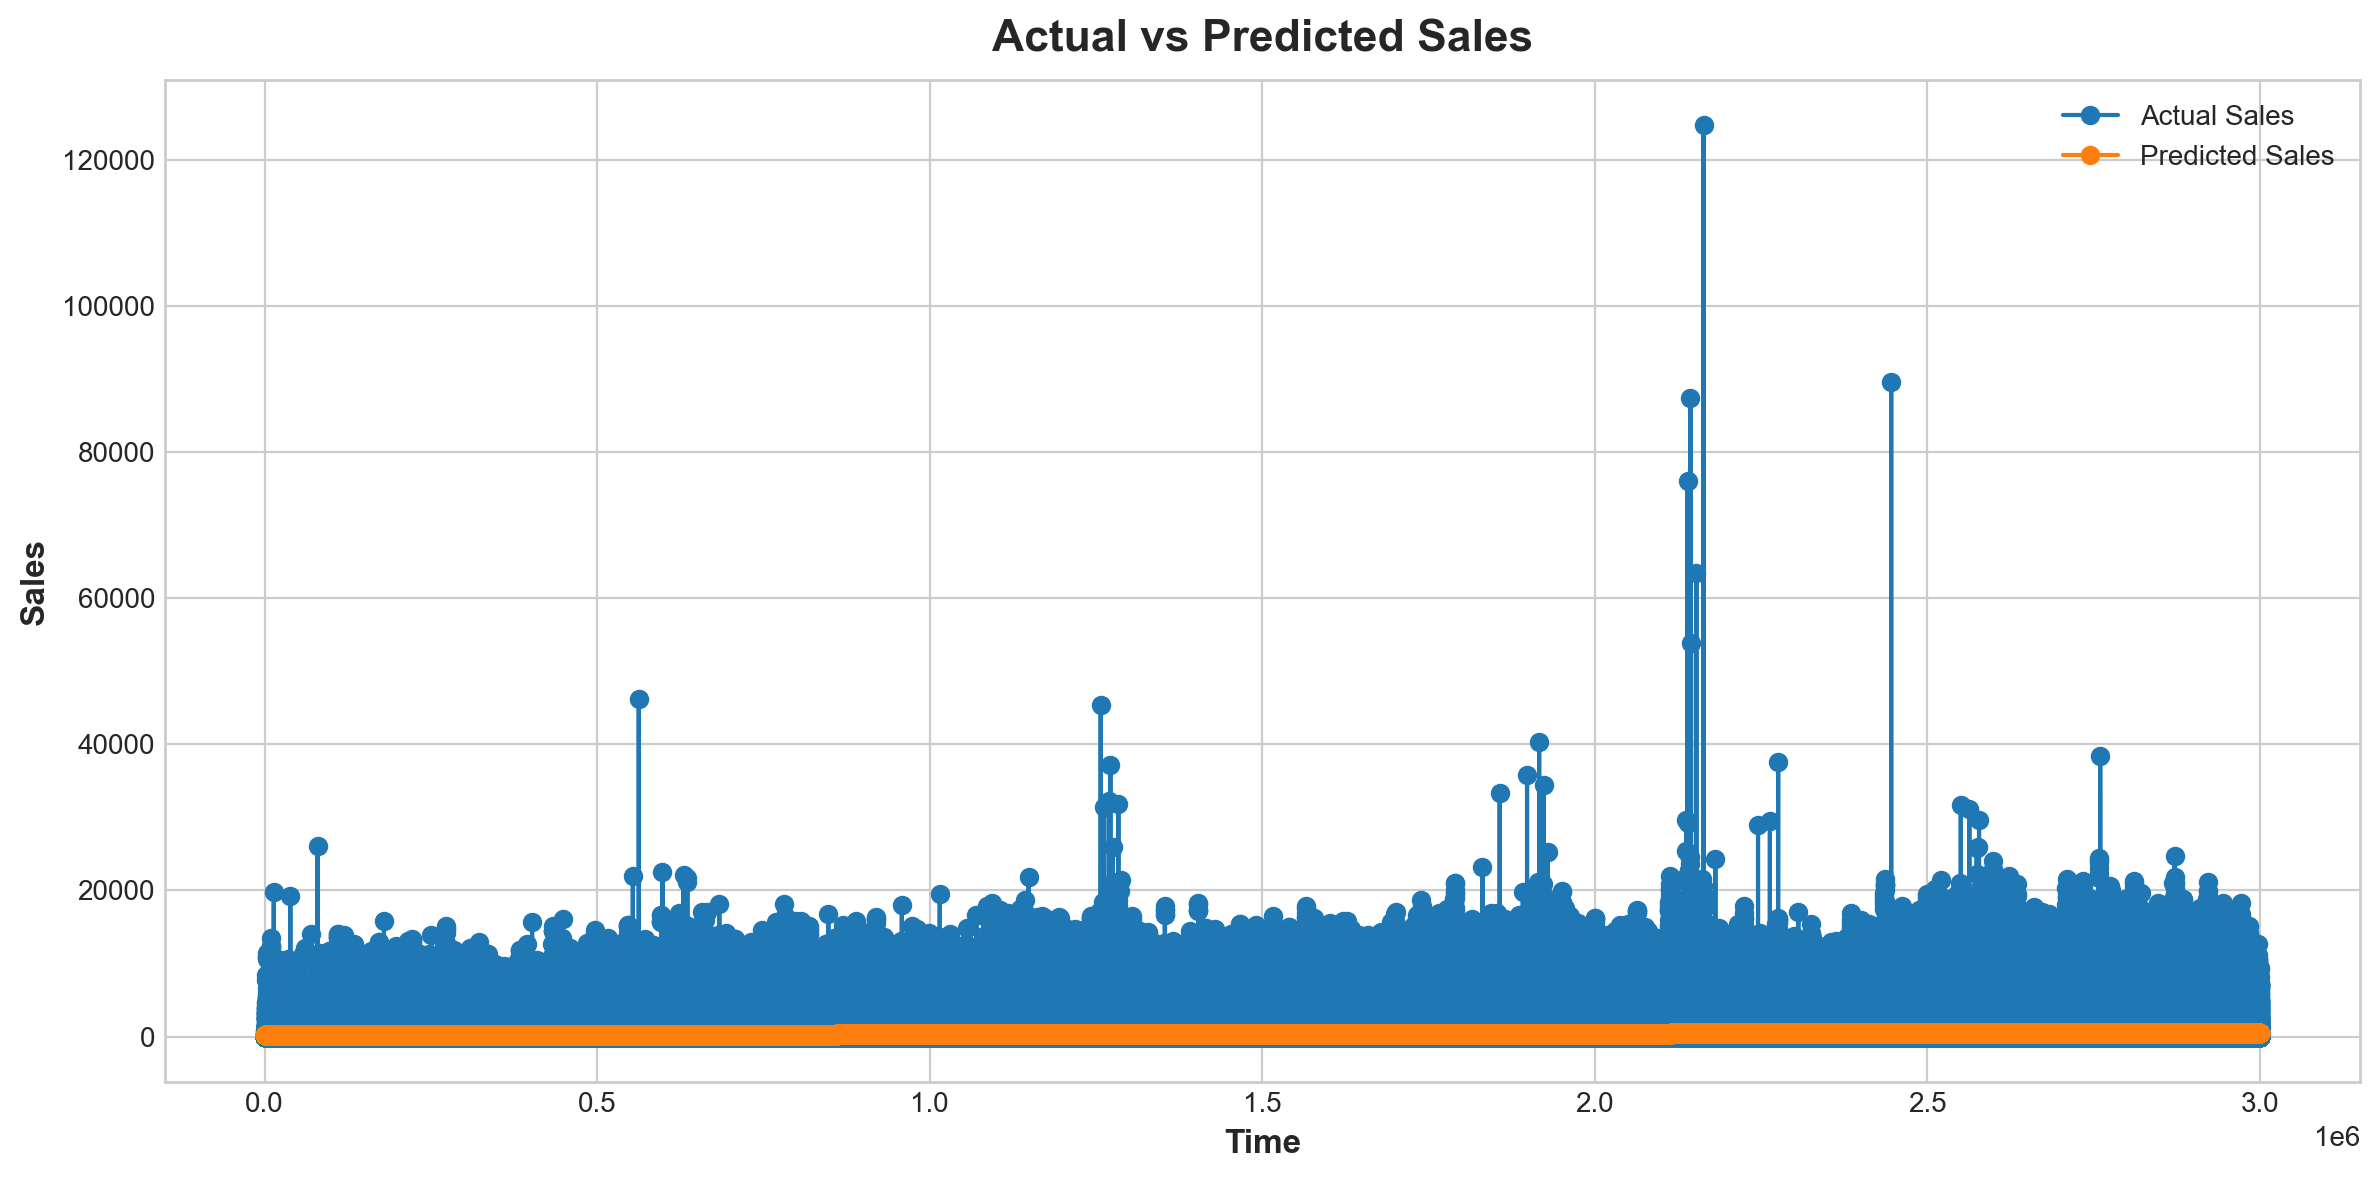

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_df["Time"], y, label="Actual Sales", marker='o')
plt.plot(train_df["Time"], y_pred, label="Predicted Sales", marker='o')
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()